# 📂 Labor Force Survery 2024
#### Goal: *Find what factors affect a person's employability*

___

### CSMODEL Major Course Output *Phase 1*

Members:
* AVELINO, Sophia Kylie
* BALINGIT, Andrei Luis
* WONG, Ching Man
* YOUNG, Cedric Francis

___

### Phase 1: data description, target research question, preprocessing, and exploratory data analysis

> Deliverables:
>
> A Jupyter Notebook containing all the data processing you did in the project. The Notebook should include Markdown
cells explaining each process, and highlighting the insights and conclusions. The Notebook should be structured in a
way that (1) is easy to understand, and (2) can be run sequentially to reproduce all outputs in your work.

---

## 📝 Section 1 - Dataset Description

### Section 1.1 - Introduction ###

This project entails exploring the Labor Force Survey (LFS) dataset, which is a nationwide survey of households every quarter that captures demographic and socio-economic information in regards to the current Labor Force of the Philippines. The primary purpose of the LFS is to obtain an estimate of employment and unemployment rates in the labor market and offer a quantitative framework for the formulation of labor market policies. The information encompasses a comprehensive range of individual and household characteristics for all the socio-economic factors.

The database, obtained from the Philippine Statistics Authority (PSA), contains records of a national sample of about 44,063 households (Batanes included) per round of surveys. It contains detailed data for each person in the households surveyed, namely demographic traits (age, sex, marital status), educational level, occupation, and work status. The reporting unit is the household, which in turn means that the statistics present the traits of people living in private households only and not those in institutions.

### Section 1.2 - Problem Statement 

The specific task we aim to address is a classification problem. In this notebook, we seek to predict whether an individual has worked in the past week(PUFC11_WORK) which is answered by a binary yes or no input, using the features provided in the LFS dataset. The target variable, PUFC11_WORK, is a binary variable indicating whether an individual has worked in the past week (Yes/No). This is a binary classification problem, where we aim to classify individuals into two groups: those who have worked and those who have not, based on their demographic and socio-economic characteristics. Thus, the goal of our models is to predict which of the two groups is a person a part of based on demographic variables, educational attainment, occupation, and household characteristics features provided by the LFS dataset. Namely, these feature columns are described as the following:

Included in the dataset is an Excel file titled 'lfs_march_2024_metadata(dictionary).xlsx' which contains a dictionary and a value set of the dataset. We have used the two in order to further understand and explore both the descriptions and categorical values of each feature provided. 

Considering this, we have categorized the features as below:

#### 1. Demographic Variables

* `PUFC04_SEX` → C04 - Sex
* `PUFC05_AGE` → C05 - Age as of Last Birthday
* `PUFC06_MSTAT` → C06 - Marital Status
* `PUFC03_REL` → C03 - Relationship to Household Head


#### 2. Household Characteristics

* `PUFREG` → Region
* `PUFHHNUM` → Household Unique Sequential Number
* `PUFHHSIZE` → Household Size
* `PUFC01_LNO` → Line Number (individual in household)


#### 3. Educational Attainment

* `PUFC07_GRADE` → C07 - Highest Grade Completed


#### 4. Migration & Overseas Work

* `PUFC08_CONWR` → C08 - Overseas Filipino Indicator


#### 5. Employment Status & Labor Force Participation

* `PUFC09_WORK` → C09 - Work Indicator
* `PUFC09A_WORK` → C09A - Work Arrangement
* `PUFC10_JOB` → C10 - Job Indicator
* `PUFC11A_PROVMUN` → C11 - Location of Work (Province, Municipality)
* `PUFC13_PROCC` → C13 - Major Occupation Group
* `PUFC15_PKB` → C15 - Major Industry Group
* `PUFC16_NATEM` → C16 - Nature of Employment
* `PUFC17_PNWHRS` → C17 - Normal Working Hours per Day
* `PUFC18_PHOURS` → C18 - Total Number of Hours Worked during the Past Week
* `PUFC19_PWMORE` → C19 - Wants More Hours of Work
* `PUFC20_PLADDW` → C20 - Looks for Additional Work
* `PUFC20B_FTWORK` → C20B - First Time Doing Any Work
* `PUFC21_PCLASS` → C21 - Class of Worker
* `PUFC22_OJOB` → C22 - Other Job Indicator
* `PUFC23_THOURS` → C23 - Total Hours Worked (All Jobs)
* `PUFC24_WWM48H` → C24 - Reason for Working >48 Hours
* `PUFC25_LOOKW` → C25 - Looked for Work or Tried to Start a Business
* `PUFC25B_FTWORK` → C25B - First Time Looking for Work
* `PUFC26_WYNOT` → C26 - Reason for Not Looking for Work
* `PUFC27_AVAIL` → C27 - Availability for Work
* `PUFC28_PREVJOB` → C28 - Previous Job Indicator
* `PUFC29_YEAR` → C29 - Last Worked (Year)
* `PUFC29_MONTH` → C29 - Last Worked (Month)
* `PUFC31_POCC` → C31 - Previous Occupation
* `PUFC33_QKB` → C33 - Kind of Business (Past Quarter)
* `PUFNEWEMPSTAT` → New Employment Criteria (Jul 2005)


#### 6. Survey Design & Weighting

* `PUFPWGTPRV` → Final Weight Based on Projection
* `PUFSVYMO` → Survey Month
* `PUFSVYYR` → Survey Year
* `PUFPSU` → PSU Number
* `PUFRPL` → Replicate

# TODO: 

The variables in this Notebook are as follows:

- `genhlth` - A categorical vector indicating general health, with categories `excellent`, `very good`, `good`, `fair`, and `poor`.
- `smoke100` - A categorical vector, 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.
- `exerany` - A categorical vector, 1 if the respondent exercised in the past month and 0 otherwise.

### Section 1.3 - Libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Section 1.4 - Importing LFS PUF March 2024.CSV

In [2]:
try:
    lfs_data = pd.read_csv("src/data/PHL-PSA-LFS-2024-03-PUF/LFS PUF March 2024.CSV")
except FileNotFoundError:
    print("Error: CSV file not found. Please make sure the file exists in the correct directory or provide the correct path.")
    exit()

## 🛀 Section 2 - Data Cleaning

### Section 2.1 - Research Questions

Given that the dataset from the Philippine Statistics Authority is a sample of the entire Filipino population's working class, we also want to investigate areas of the said sector with regards to how any of these factors have an effect on the likelihood of employment for each individual. With this in mind, the following is our main research question:

1. What demographic, educational, and work-related factors are significantly associated with a Filipino citizen's likelihood of being employed in and out of the Philippines?
    - or in simpler terms: **What factors affect a Filipino citizen's employability?**


This study examines demographic characteristics, educational attainment, and work-related variables to determine which factors are most associated with employment status in the Philippines and employment status of OFWs abroad.

### Section 2.2 - Data Pre-Processing

But before we can even proceed with analyzing such, we first must pre-process our dataset and prepare it for further analysis.

We shall start by checking for the raw data's data type per column, in order to understand what dataset we are handling.

In [3]:
lfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PUFREG           44063 non-null  int64  
 1   PUFHHNUM         44063 non-null  int64  
 2   PUFPWGTPRV       44063 non-null  float64
 3   PUFSVYMO         44063 non-null  int64  
 4   PUFSVYYR         44063 non-null  int64  
 5   PUFPSU           44063 non-null  int64  
 6   PUFRPL           44063 non-null  int64  
 7   PUFHHSIZE        44063 non-null  int64  
 8   PUFC01_LNO       44063 non-null  int64  
 9   PUFC03_REL       44063 non-null  int64  
 10  PUFC04_SEX       44063 non-null  int64  
 11  PUFC05_AGE       44063 non-null  int64  
 12  PUFC06_MSTAT     44063 non-null  object 
 13  PUFC07_GRADE     44063 non-null  object 
 14  PUFC08_CONWR     44063 non-null  object 
 15  PUFC09_WORK      44063 non-null  object 
 16  PUFC09A_WORK     44063 non-null  object 
 17  PUFC10_JOB  

---
Of interest to us, there are:
<ul><li>1 contains float values, </li>
<li>11 contain integer values, and </li>
<li><b>29 are object values</b>.</li></ul>


It is immediately evident now that there could be entries within the dataset that need to be processed because of the `object` datatype, and converted to some other attribute that could be mathematically analyzed.

---
Let's check for duplicates:

In [4]:
lfs_data.duplicated().sum()

np.int64(0)

No duplicates here, and therefore no cleaning is needed in this regard.

However, the dataset seems to contain null values in the form of whitespaces. Let's count those:

In [5]:
has_null = lfs_data.apply(lambda col: col.str.isspace().sum() if col.dtype == 'object' else 0)

print("Number Empty Cells:")
print(has_null[has_null > 0])

Number Empty Cells:
PUFC06_MSTAT        3009
PUFC07_GRADE        3009
PUFC08_CONWR       11539
PUFC09_WORK         3818
PUFC09A_WORK       24231
PUFC10_JOB         23650
PUFC11A_PROVMUN    24096
PUFC13_PROCC       24096
PUFC15_PKB         24096
PUFC16_NATEM       24215
PUFC17_PNWHRS      24215
PUFC18_PHOURS      24215
PUFC19_PWMORE      24215
PUFC20_PLADDW      24215
PUFC20B_FTWORK     24215
PUFC21_PCLASS      24215
PUFC22_OJOB        24215
PUFC23_THOURS      24215
PUFC24_WWM48H      34303
PUFC25_LOOKW       32196
PUFC25B_FTWORK     43587
PUFC26_WYNOT       32672
PUFC27_AVAIL       42875
PUFC28_PREVJOB     32196
PUFC29_YEAR        38375
PUFC29_MONTH       38375
PUFC31_POCC        38375
PUFC33_QKB         38375
PUFNEWEMPSTAT      12348
dtype: int64


We will analyze the dataset later on within this Notebook as to why there exists so much whitespaces in each column.

But for now, we shall standardize these whitespaces by replacing the values with -1:

In [6]:
lfs_data.replace(r"^\s+$", -1, regex=True, inplace=True)
nan_counts_per_column = lfs_data.isna().sum()
print(nan_counts_per_column[nan_counts_per_column > 0])

Series([], dtype: int64)


Now that these are -1, let's return to the data types, and find if our object columns from earlier are convertible to `integers` (or `float`) instead of `object`:

In [7]:
int_convertible_columns = []

for col in lfs_data.columns:
    if lfs_data[col].dtypes == 'object':  
        try:
            float_vals = lfs_data[col].dropna().astype(float)
            if (float_vals % 1 == 0).all():
                int_convertible_columns.append(col)
        except ValueError:
            pass 

print("Safely convertable to int:\n")
for i in range(0, len(int_convertible_columns), 5):
    line_items = int_convertible_columns[i : i + 5]
    print(line_items)

Safely convertable to int:

['PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC08_CONWR', 'PUFC09_WORK', 'PUFC09A_WORK']
['PUFC10_JOB', 'PUFC11A_PROVMUN', 'PUFC13_PROCC', 'PUFC15_PKB', 'PUFC16_NATEM']
['PUFC17_PNWHRS', 'PUFC18_PHOURS', 'PUFC19_PWMORE', 'PUFC20_PLADDW', 'PUFC20B_FTWORK']
['PUFC21_PCLASS', 'PUFC22_OJOB', 'PUFC23_THOURS', 'PUFC24_WWM48H', 'PUFC25_LOOKW']
['PUFC25B_FTWORK', 'PUFC26_WYNOT', 'PUFC27_AVAIL', 'PUFC28_PREVJOB', 'PUFC29_YEAR']
['PUFC29_MONTH', 'PUFC31_POCC', 'PUFC33_QKB', 'PUFNEWEMPSTAT']


In [8]:
for col in int_convertible_columns:
    lfs_data[col] = lfs_data[col].astype(int) 

---
Let's also apply the unique() function to our dataset.

In [9]:
lfs_data.apply(lambda x: x.nunique())

PUFREG                17
PUFHHNUM           11114
PUFPWGTPRV          9442
PUFSVYMO               1
PUFSVYYR               1
PUFPSU               536
PUFRPL                 7
PUFHHSIZE             17
PUFC01_LNO            20
PUFC03_REL            11
PUFC04_SEX             2
PUFC05_AGE           100
PUFC06_MSTAT           7
PUFC07_GRADE         308
PUFC08_CONWR           5
PUFC09_WORK            3
PUFC09A_WORK           6
PUFC10_JOB             4
PUFC11A_PROVMUN      762
PUFC13_PROCC          44
PUFC15_PKB            81
PUFC16_NATEM           4
PUFC17_PNWHRS         17
PUFC18_PHOURS         85
PUFC19_PWMORE          3
PUFC20_PLADDW          3
PUFC20B_FTWORK         3
PUFC21_PCLASS          8
PUFC22_OJOB            3
PUFC23_THOURS        100
PUFC24_WWM48H         18
PUFC25_LOOKW           3
PUFC25B_FTWORK         3
PUFC26_WYNOT          13
PUFC27_AVAIL           3
PUFC28_PREVJOB         3
PUFC29_YEAR           62
PUFC29_MONTH          14
PUFC31_POCC           44
PUFC33_QKB            79


And so now, if we recheck the datatypes of each of the columns within the dataset, we can see that they all have a specific type and not just `object`.

In [10]:
lfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PUFREG           44063 non-null  int64  
 1   PUFHHNUM         44063 non-null  int64  
 2   PUFPWGTPRV       44063 non-null  float64
 3   PUFSVYMO         44063 non-null  int64  
 4   PUFSVYYR         44063 non-null  int64  
 5   PUFPSU           44063 non-null  int64  
 6   PUFRPL           44063 non-null  int64  
 7   PUFHHSIZE        44063 non-null  int64  
 8   PUFC01_LNO       44063 non-null  int64  
 9   PUFC03_REL       44063 non-null  int64  
 10  PUFC04_SEX       44063 non-null  int64  
 11  PUFC05_AGE       44063 non-null  int64  
 12  PUFC06_MSTAT     44063 non-null  int64  
 13  PUFC07_GRADE     44063 non-null  int64  
 14  PUFC08_CONWR     44063 non-null  int64  
 15  PUFC09_WORK      44063 non-null  int64  
 16  PUFC09A_WORK     44063 non-null  int64  
 17  PUFC10_JOB  

Now that we have verified that most data on the dataset are superficially clean, we can now proceed with our EDA and process our data further from there.

### Section 2.3 - Exploratory Data Analysis

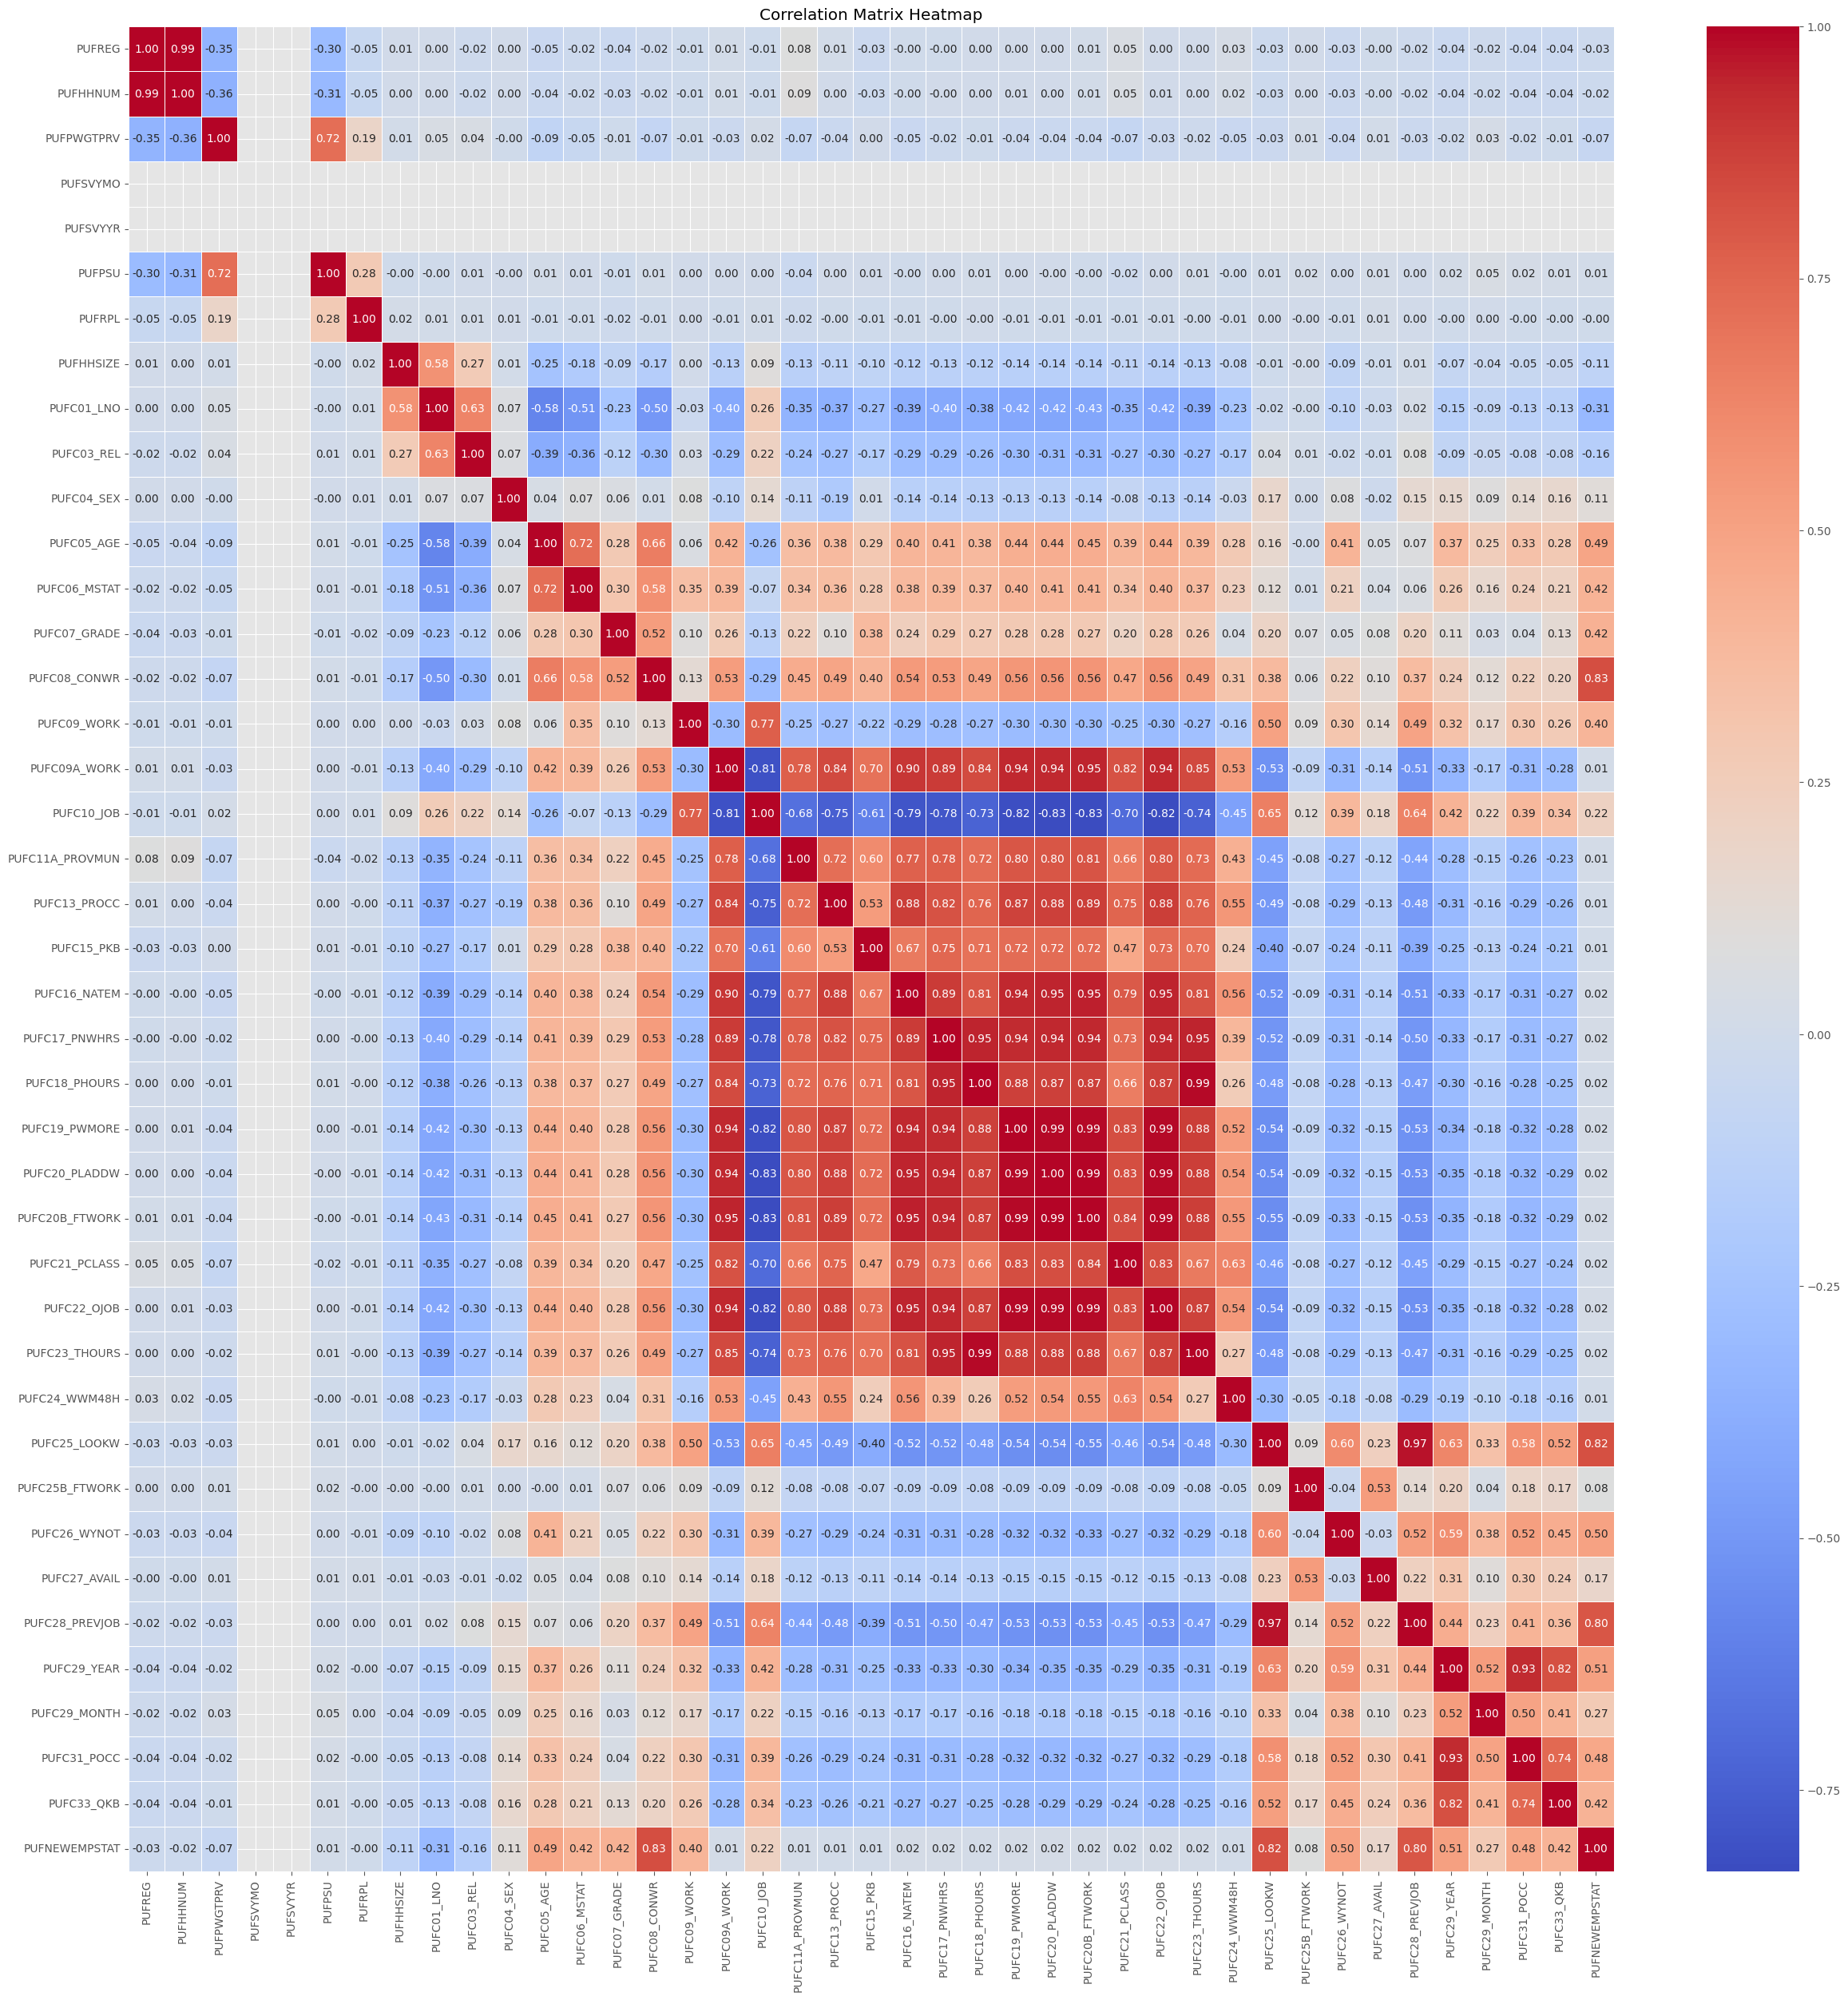

In [11]:
correlation_matrix = lfs_data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Section 2.3.1 - Demographics & Employability

##### Research Sub-Question: 
* How do age, sex, marital status, and region influence the probability of being employed?

##### Why This Matters: 
* Demographic characteristics such as age, sex, marital status, and region often correlate with labor force participation and are foundational predictors in labor market analysis. These variables capture both social structures and systemic inequalities that may influence hiring, availability, and types of employment. Understanding these patterns allows for contextualizing broader employment trends in the Philippines.

##### Histogram of Age split by `Employed` vs. `Unemployed`

Number of null ages: 12348
Number of employed individuals: 19848
Number of unemployed individuals: 670
Number of temporarily unemployed individuals: 11197


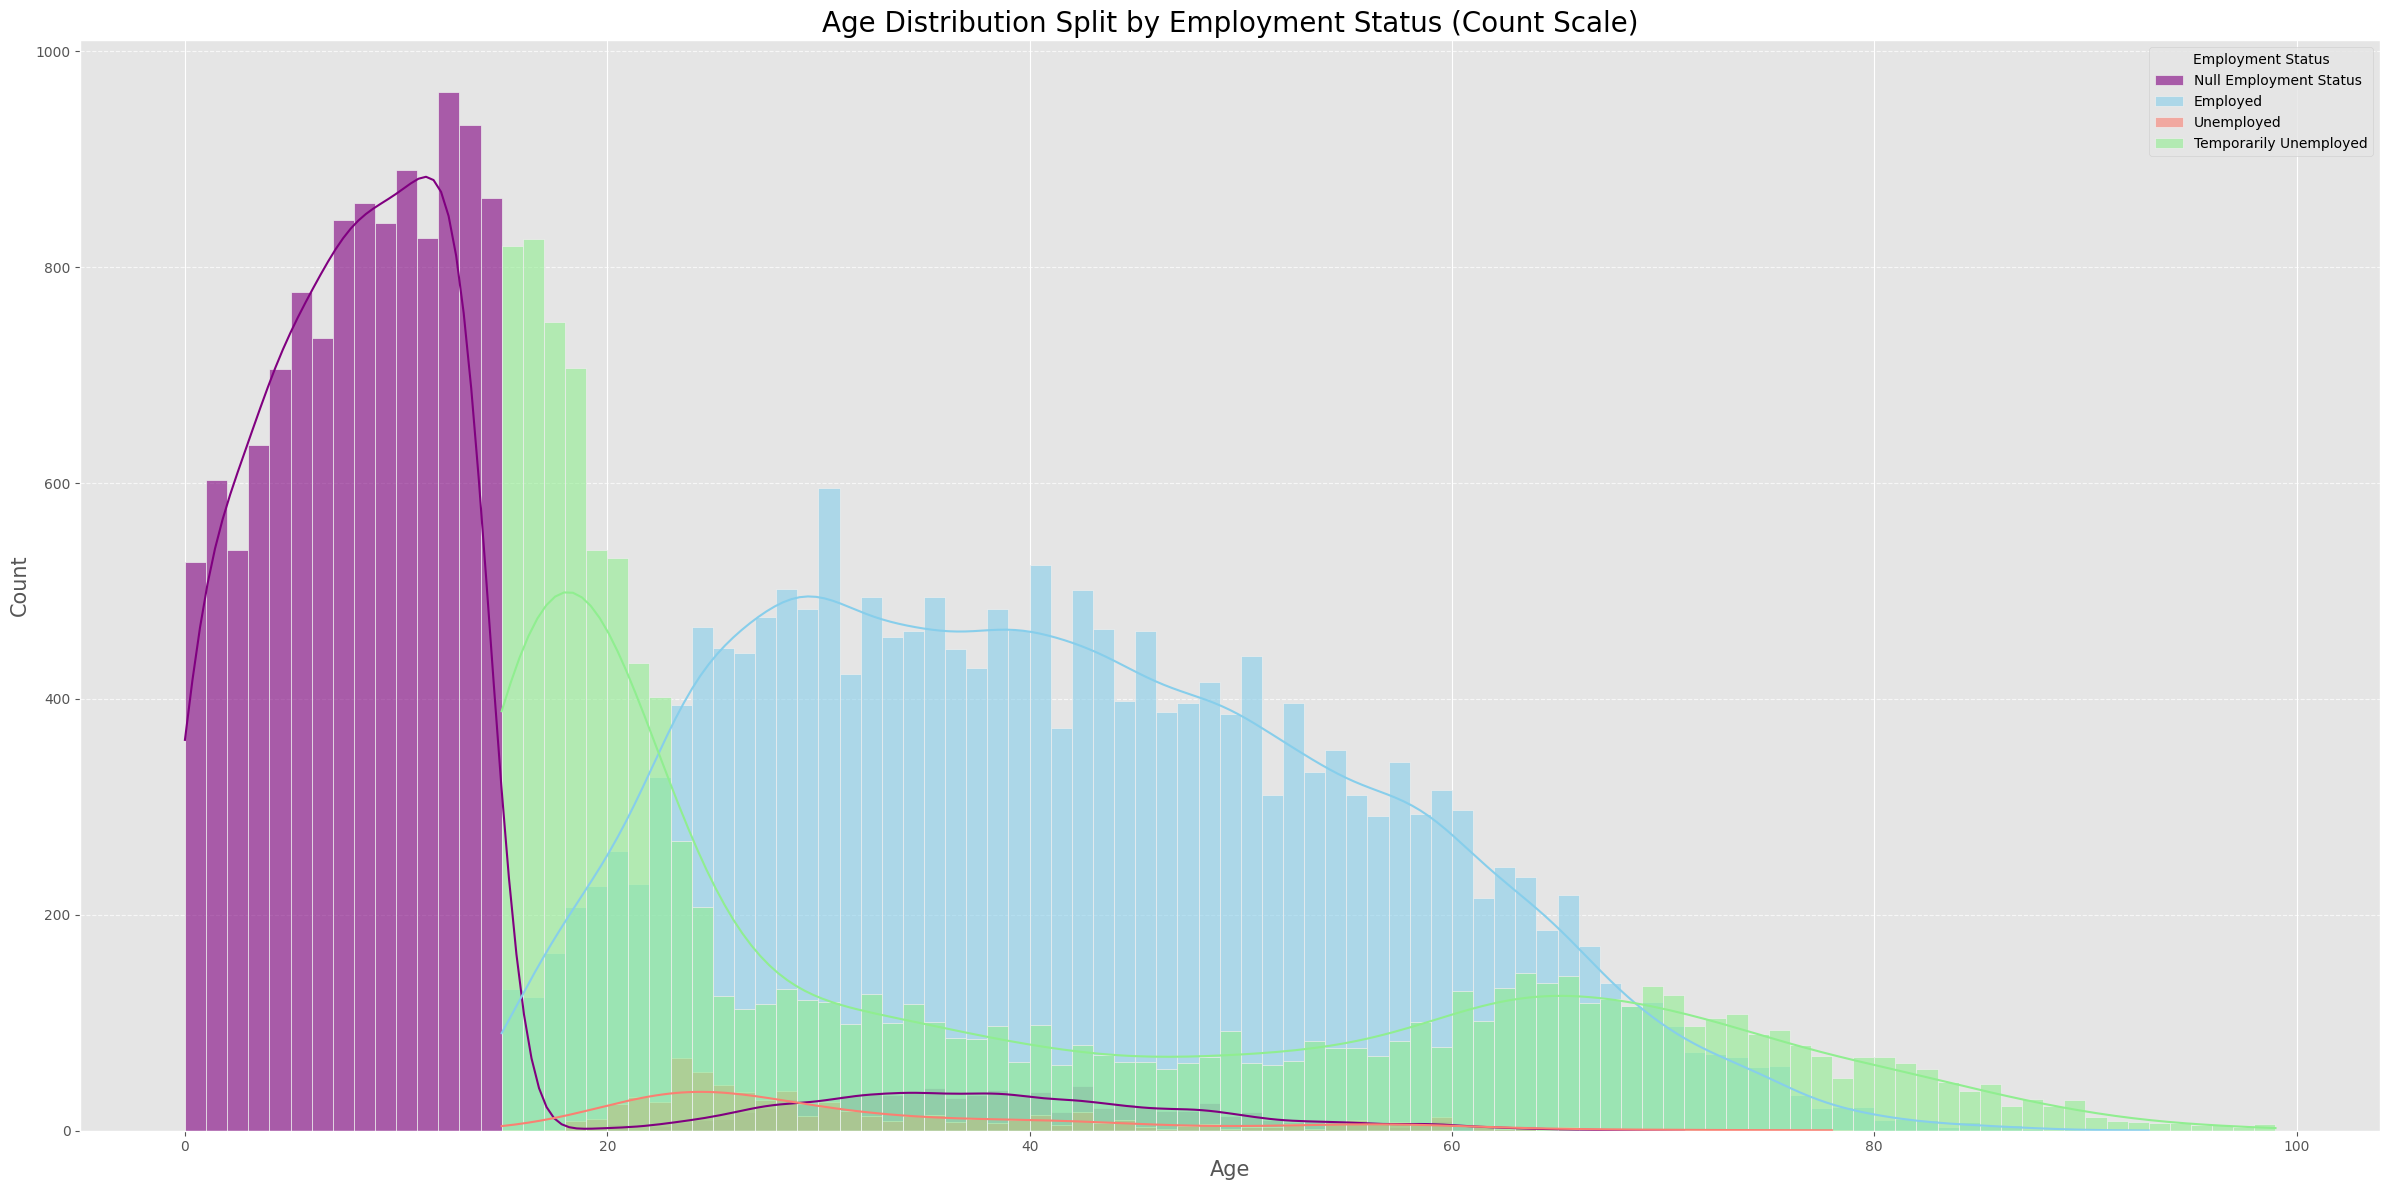

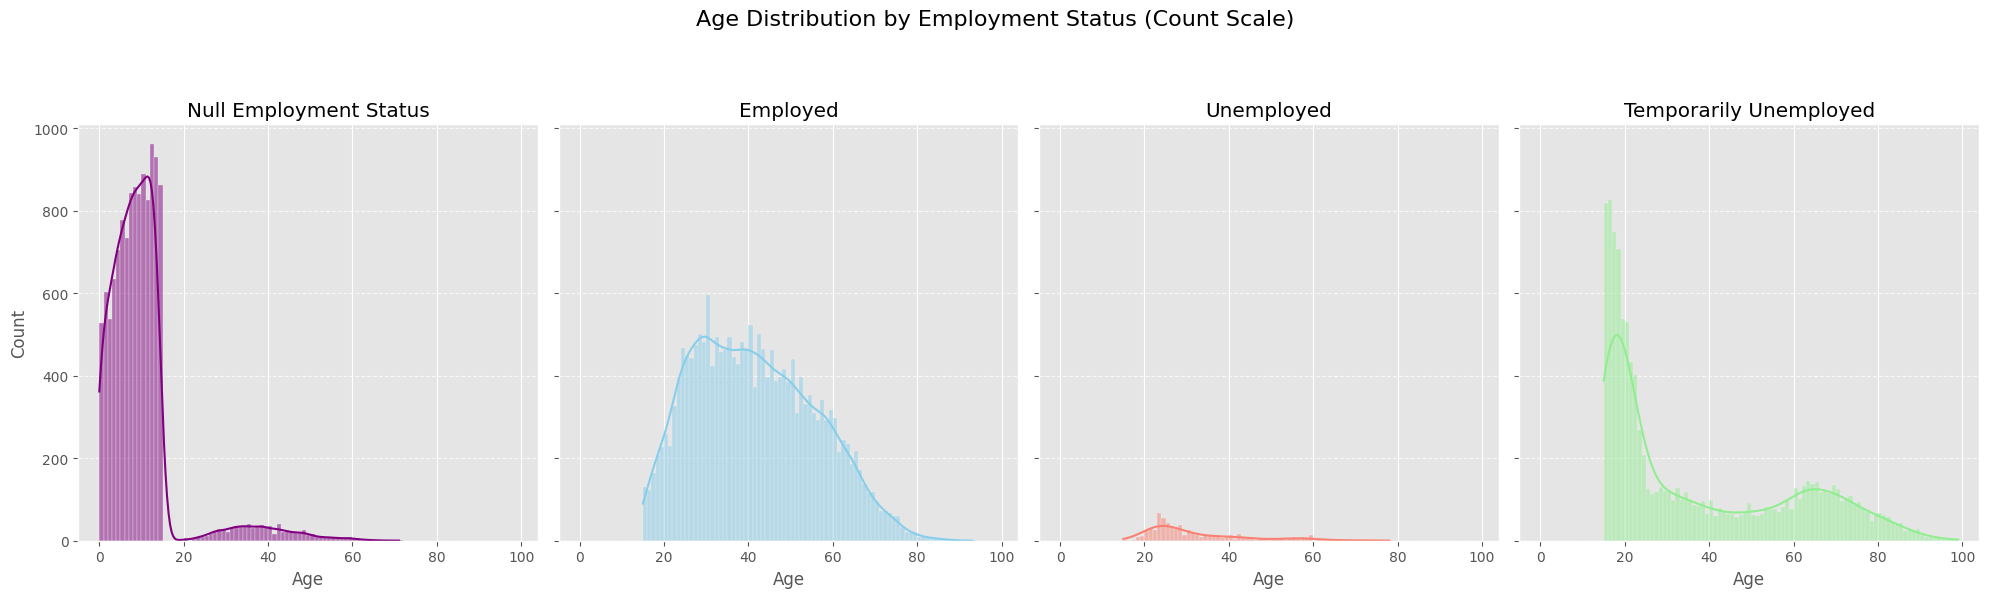

In [12]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFNEWEMPSTAT': 'EmploymentStatus'
})

null_ages = df[df['EmploymentStatus'] == -1]['Age'].dropna()
employed_ages = df[df['EmploymentStatus'] == 1]['Age'].dropna()
unemployed_ages = df[df['EmploymentStatus'] == 2]['Age'].dropna()
temporarily_unemployed_ages = df[df['EmploymentStatus'] == 3]['Age'].dropna()

print(f"Number of null ages: {len(null_ages)}")
print(f"Number of employed individuals: {len(employed_ages)}")
print(f"Number of unemployed individuals: {len(unemployed_ages)}")
print(f"Number of temporarily unemployed individuals: {len(temporarily_unemployed_ages)}")

all_ages_for_bins = pd.concat([null_ages, employed_ages, unemployed_ages, temporarily_unemployed_ages]).dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())

common_bins = np.linspace(min_age, max_age, 100)

plt.figure(figsize=(24, 12))

plot_stat = 'count'

sns.histplot(null_ages, bins=common_bins, color='purple', label='Null Employment Status', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(employed_ages, bins=common_bins, color='skyblue', label='Employed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', label='Unemployed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(temporarily_unemployed_ages, bins=common_bins, color='lightgreen', label='Temporarily Unemployed', alpha=0.6, kde=True, stat=plot_stat)

# Add title and labels
plt.title(f'Age Distribution Split by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Employment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# show individual plots for each employment status for better clarity in comparison
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True) # 4 subplots

# Plot for Null Employment Status
sns.histplot(null_ages, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Employment Status')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Employed
sns.histplot(employed_ages, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Employed')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Unemployed
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Unemployed')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Temporarily Unemployed
sns.histplot(temporarily_unemployed_ages, bins=common_bins, color='lightgreen', kde=True, ax=axes[3], stat=plot_stat)
axes[3].set_title('Temporarily Unemployed')
axes[3].set_xlabel('Age')
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

[ 1 -1  2]
Number of individuals with unknown work: 3818
Number of individuals with work: 19832
Number of individuals with no work: 20413


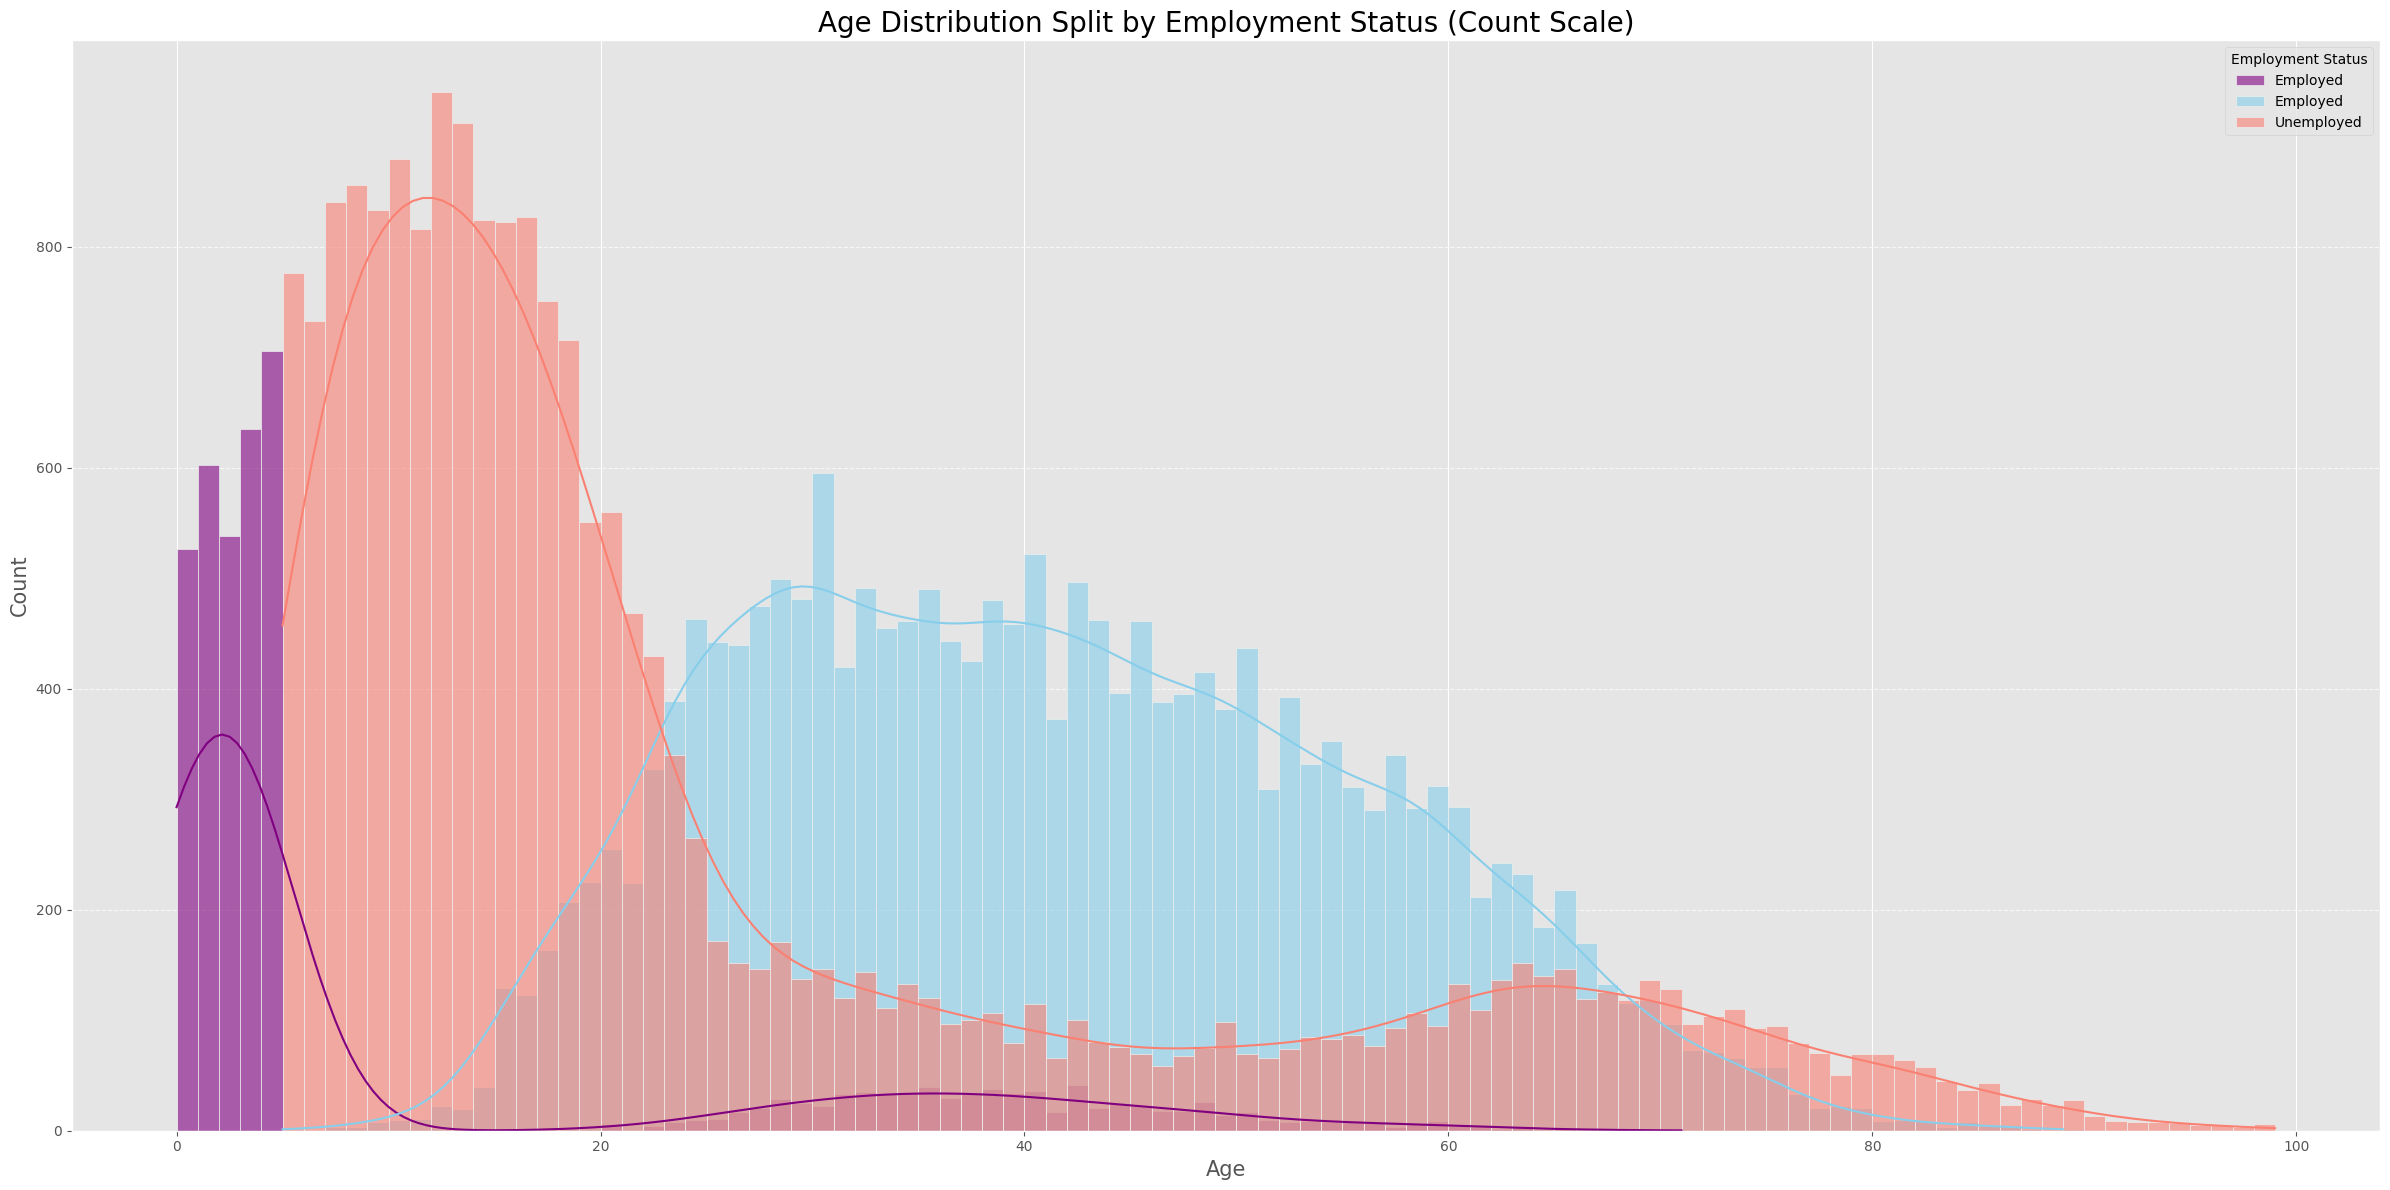

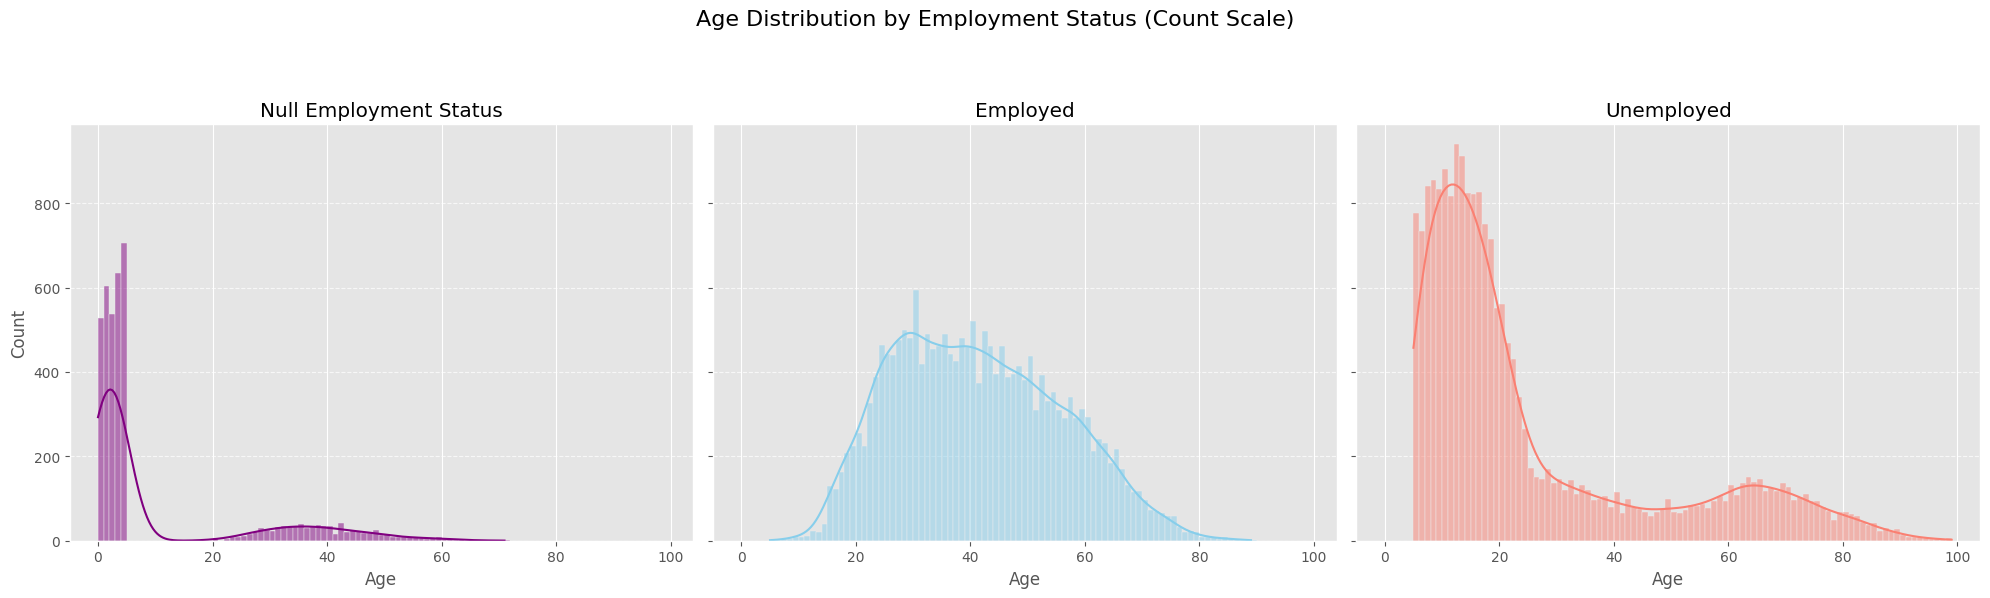

In [13]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFC09_WORK': 'WorkStatus'
})

print(lfs_data['PUFC09_WORK'].unique())

null_work = df[df['WorkStatus'] == -1]['Age'].dropna()
has_work = df[df['WorkStatus'] == 1]['Age'].dropna()
no_work = df[df['WorkStatus'] == 2]['Age'].dropna()

print(f"Number of individuals with unknown work: {len(null_work)}")
print(f"Number of individuals with work: {len(has_work)}")
print(f"Number of individuals with no work: {len(no_work)}")

all_ages_for_bins = pd.concat([null_work, has_work, no_work]).dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())

common_bins = np.linspace(min_age, max_age, 100)

plt.figure(figsize=(24, 12))

plot_stat = 'count'


sns.histplot(null_work, bins=common_bins, color='purple', label='Employed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(has_work, bins=common_bins, color='skyblue', label='Employed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(no_work, bins=common_bins, color='salmon', label='Unemployed', alpha=0.6, kde=True, stat=plot_stat)

plt.title(f'Age Distribution Split by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Employment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot for Null Employment Status
sns.histplot(null_work, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Employment Status')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Employed
sns.histplot(has_work, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Employed')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Unemployed
sns.histplot(no_work, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Unemployed')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02) # Main title for subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

##### Stacked bar plot: `Sex` vs. `Employment Status`

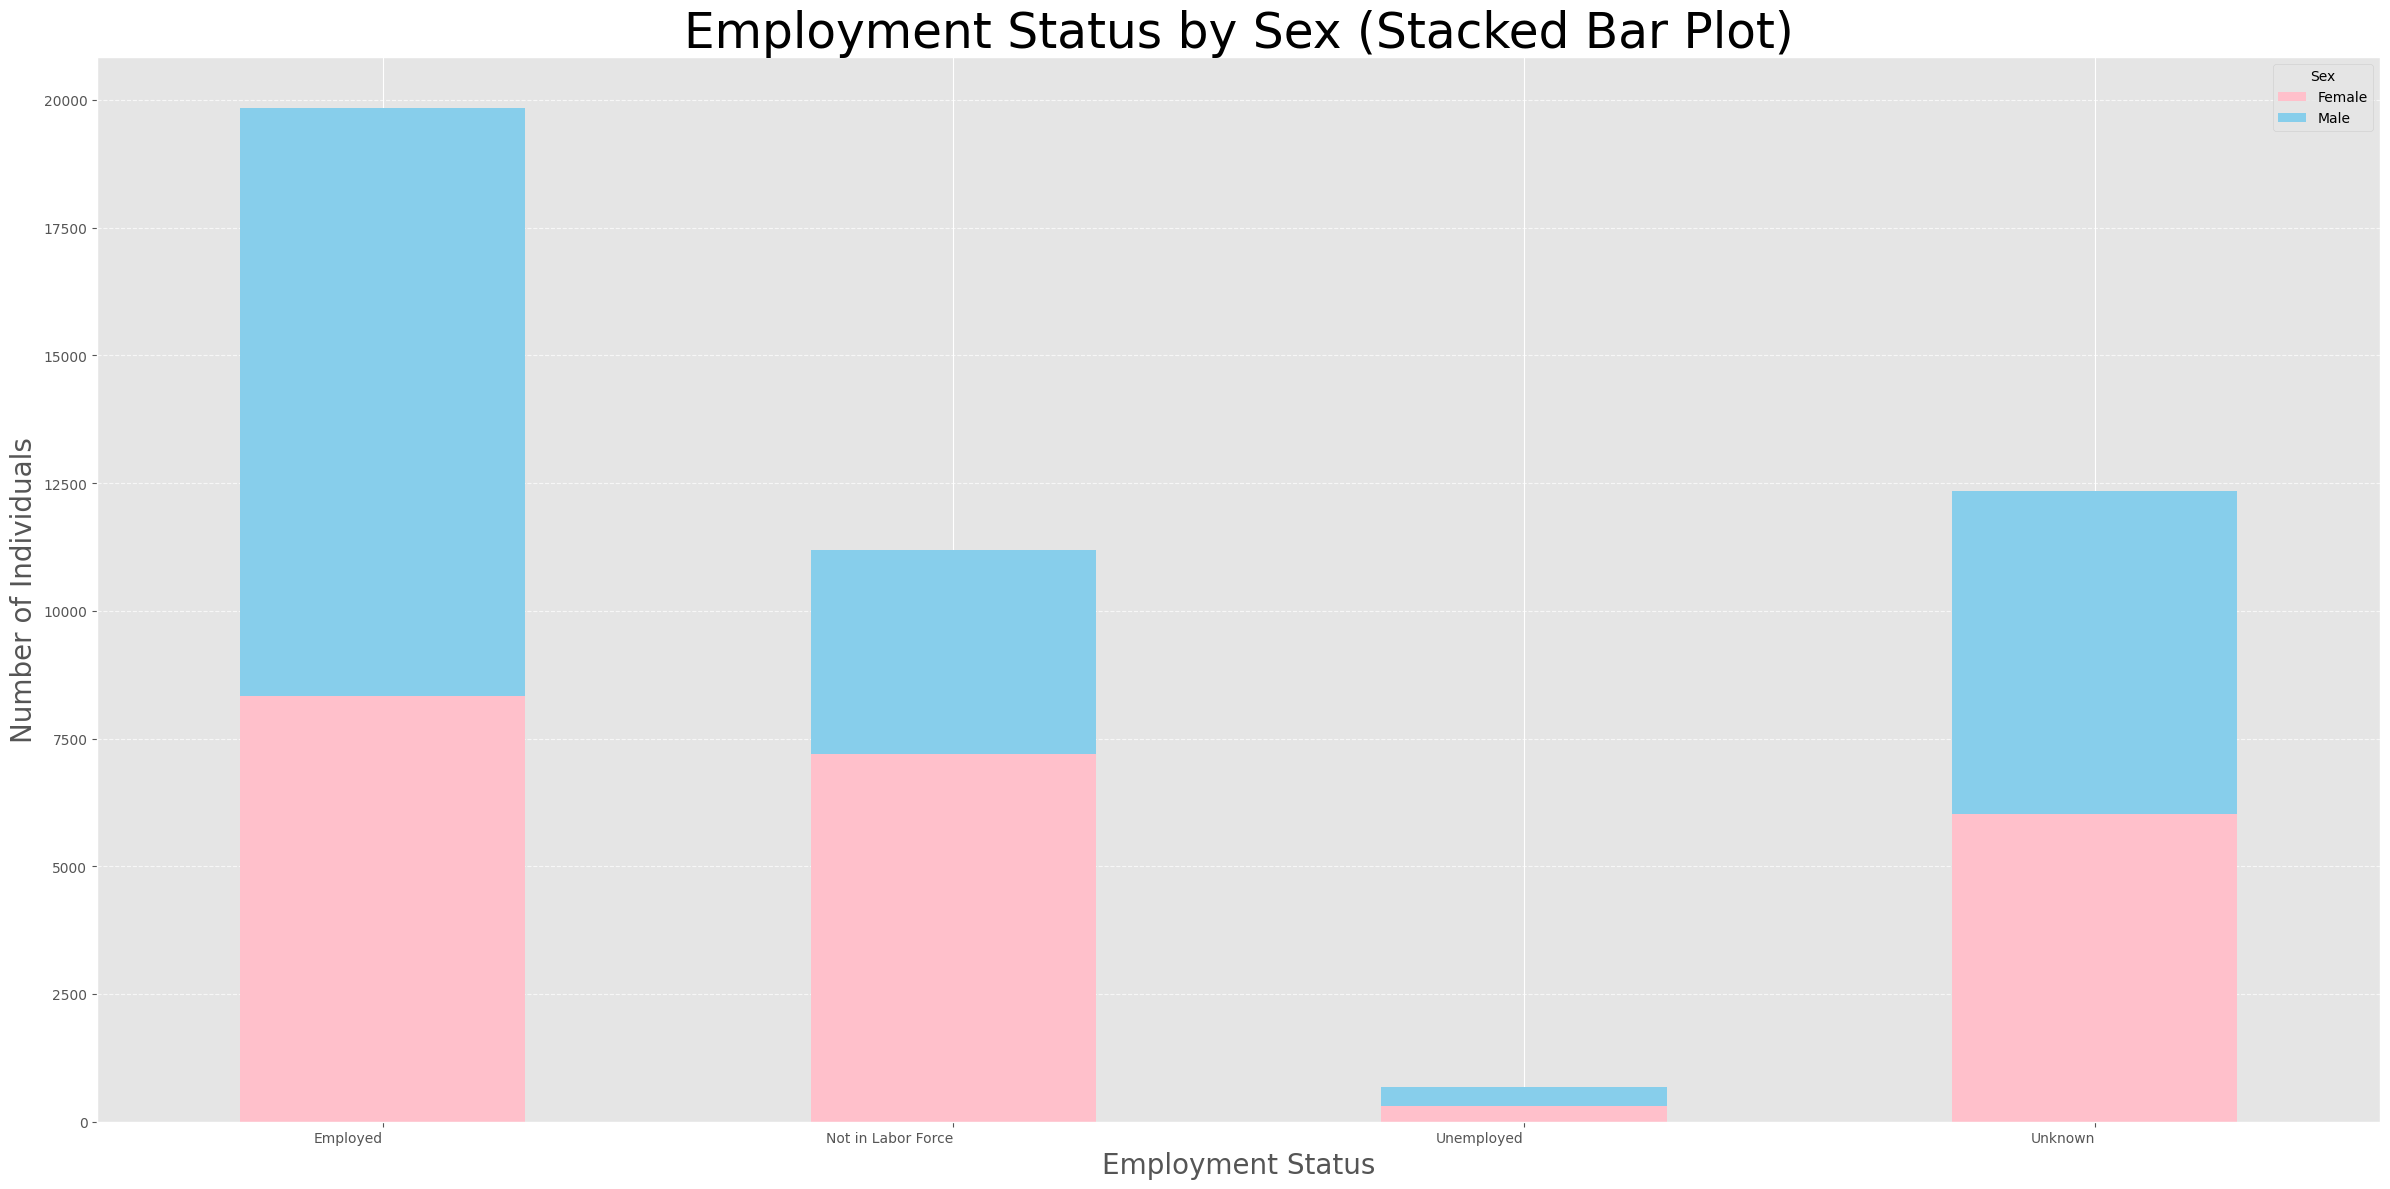

In [ ]:
sex_mapping = {1: 'Male', 2: 'Female'}
employment_status_mapping = {-1: 'Unknown', 1: 'Employed', 2: 'Unemployed', 3: 'Not in Labor Force'}
lfs_data['PUFC04_SEX'] = lfs_data['PUFC04_SEX'].map(sex_mapping)
lfs_data['PUFNEWEMPSTAT'] = lfs_data['PUFNEWEMPSTAT'].map(employment_status_mapping)
employment_sex_counts = lfs_data.groupby(['PUFNEWEMPSTAT', 'PUFC04_SEX']).size().unstack(fill_value=0)

plt.figure(figsize=(24, 12))

columns_to_plot = employment_sex_counts.columns.tolist()
custom_colors = ['skyblue' for _ in columns_to_plot]
if 'Female' in columns_to_plot:
    female_index = columns_to_plot.index('Female')
    custom_colors[female_index] = 'pink'
employment_sex_counts.plot(kind='bar', stacked=True, color=custom_colors, ax=plt.gca())

plt.title('Employment Status by Sex (Stacked Bar Plot)', fontsize=35)
plt.xlabel('Employment Status', fontsize=20)
plt.ylabel('Number of Individuals', fontsize=20)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Bar plot: `Marital Status` vs. % `Employed`

/var/folders/hv/jnmd_b7123gfd5f464464gh80000gn/T/ipykernel_10378/686383562.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status_Label', y='Percent_Employed', data=merged_counts, palette='viridis')


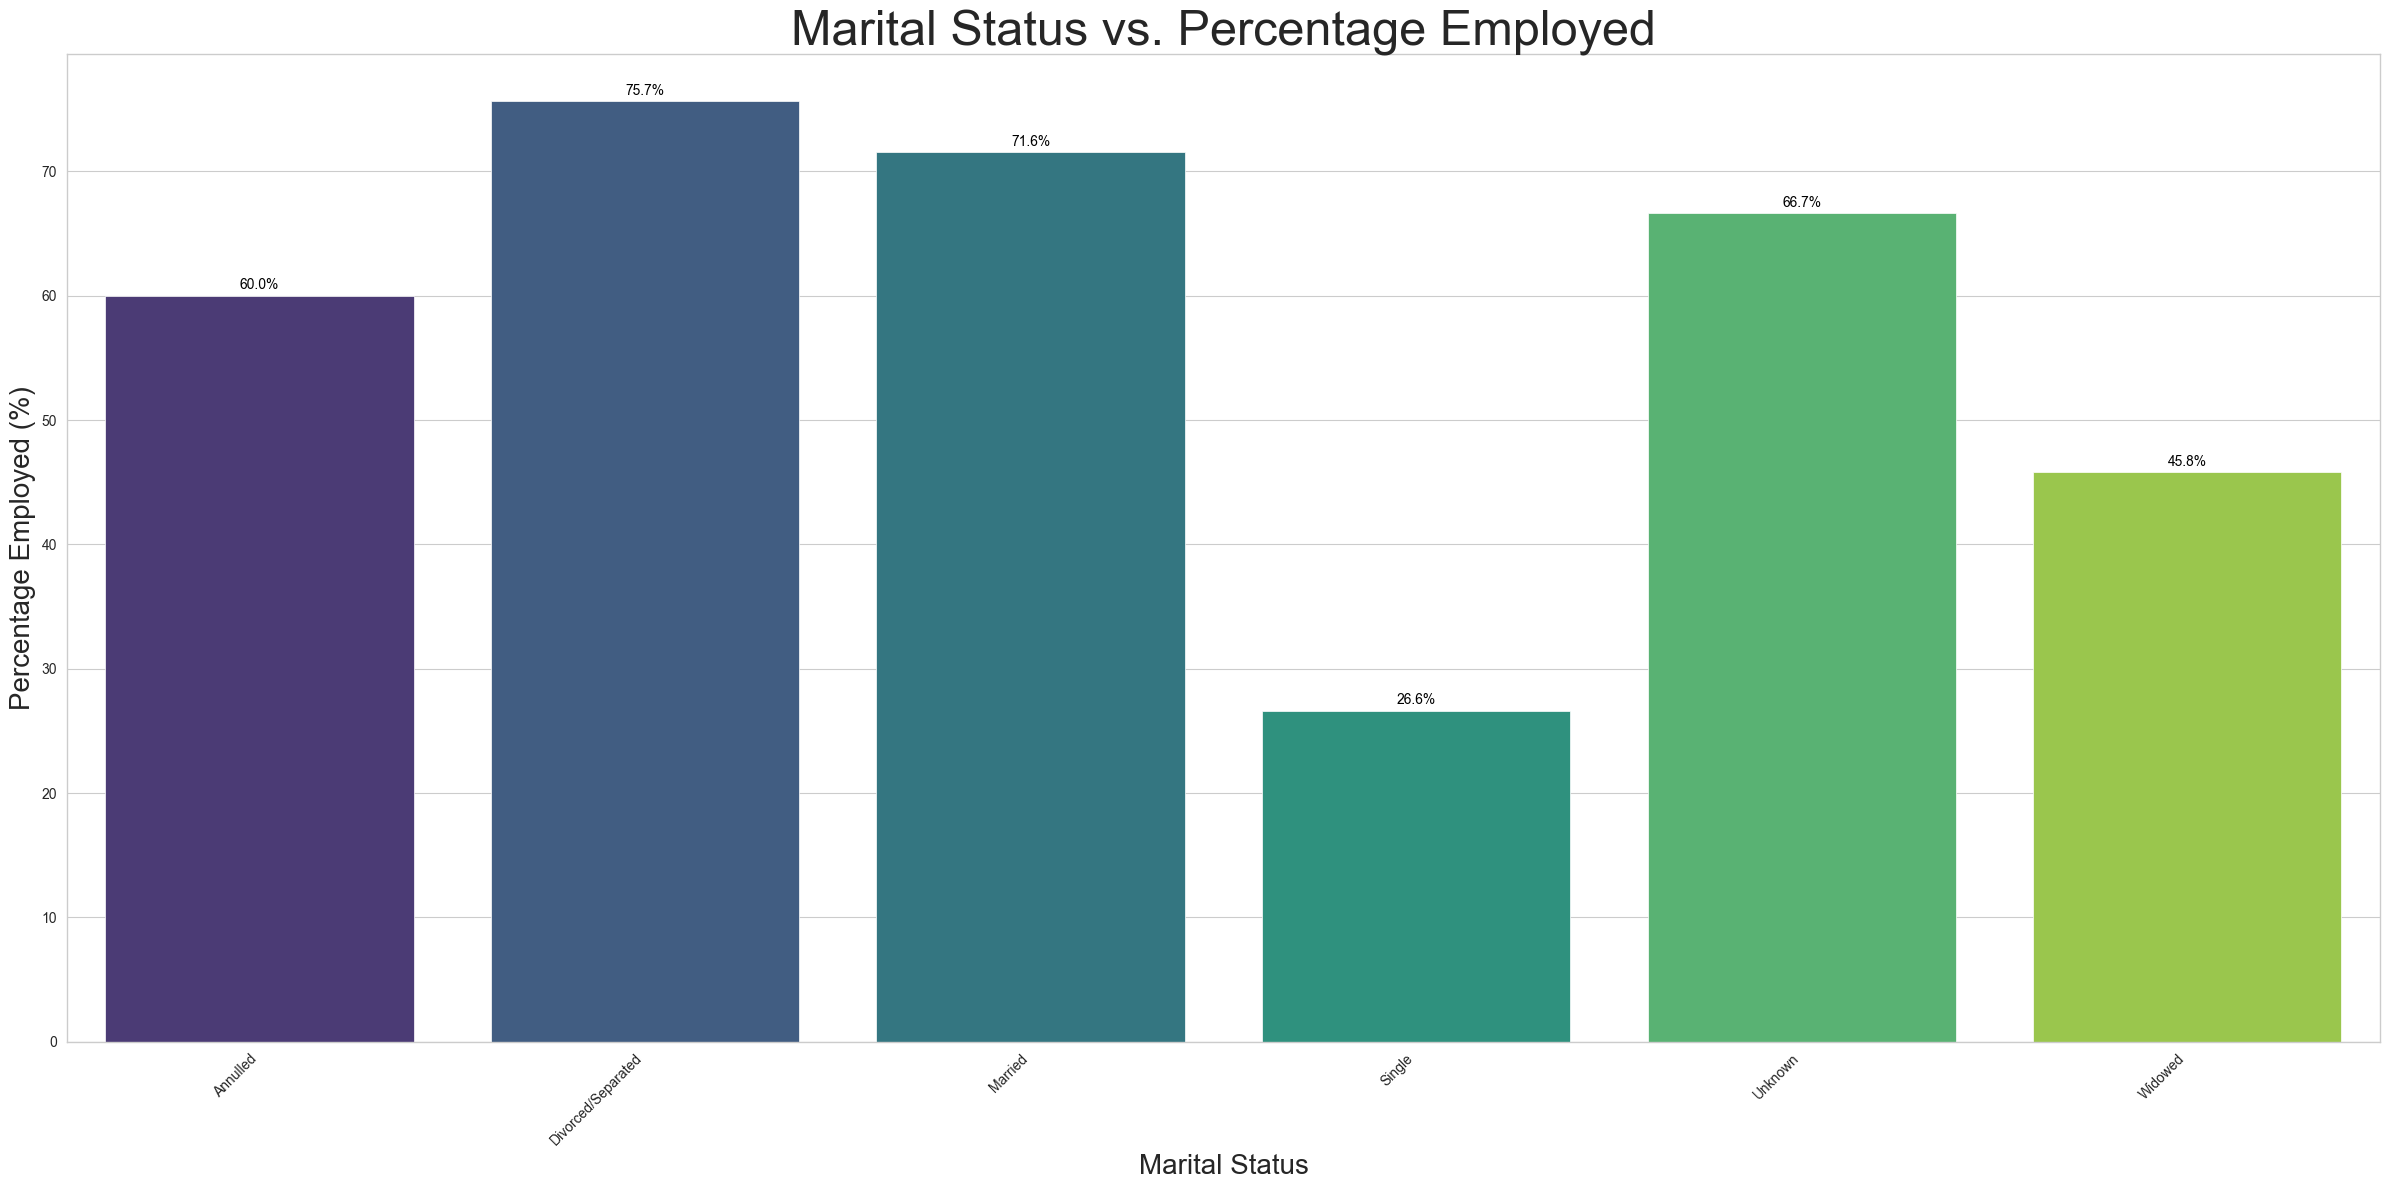


Percentage Employed by Marital Status:
Marital_Status_Label  Percent_Employed
            Annulled         60.000000
  Divorced/Separated         75.661376
             Married         71.564116
              Single         26.634769
             Unknown         66.666667
             Widowed         45.794393

Total Counts by Marital Status:
Marital_Status_Label  Total_Count
            Annulled            5
  Divorced/Separated         1134
             Married        17601
              Single        20064
             Unknown            3
             Widowed         2247


In [23]:
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced/Separated',
    5: 'Annulled',
    6: 'Unknown'
}

employed_status_map = {
    1: 'Yes',
    2: 'No'
}

lfs_data['Marital_Status_Label'] = lfs_data['PUFC06_MSTAT'].map(marital_status_map)
lfs_data['Employed_Status_Label'] = lfs_data['PUFC09_WORK'].map(employed_status_map)

employed_counts = lfs_data[lfs_data['Employed_Status_Label'] == 'Yes'] \
                         .groupby('Marital_Status_Label') \
                         .size() \
                         .reset_index(name='Employed_Count')
total_counts = lfs_data.groupby('Marital_Status_Label') \
                       .size() \
                       .reset_index(name='Total_Count')
merged_counts = pd.merge(employed_counts, total_counts, on='Marital_Status_Label', how='left')
merged_counts['Percent_Employed'] = (merged_counts['Employed_Count'] / merged_counts['Total_Count']) * 100
merged_counts['Percent_Employed'] = merged_counts['Percent_Employed'].fillna(0)


sns.set_style("whitegrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='Marital_Status_Label', y='Percent_Employed', data=merged_counts, palette='viridis')
plt.title('Marital Status vs. Percentage Employed', fontsize=35)
plt.xlabel('Marital Status', fontsize=20)
plt.ylabel('Percentage Employed (%)', fontsize=20)
plt.xticks(rotation=45, ha='right')

for index, row in merged_counts.iterrows():
    plt.text(index, row['Percent_Employed'] + 0.5, f"{row['Percent_Employed']:.1f}%",
             color='black', ha="center")

plt.tight_layout()
plt.show()

print("\nPercentage Employed by Marital Status:")
print(merged_counts[['Marital_Status_Label', 'Percent_Employed']].to_string(index=False))
print("\nTotal Counts by Marital Status:")
print(total_counts.to_string(index=False))


#### 📉 Summary of Insights:
- 
Employment tends to increase with age until mid-30s, then plateaus or drops.
- Men are more likely to be employed than women in this dataset.
- Married individuals show higher employment, possibly due to financial responsibility.
- Regional disparities exist, with NCR showing higher employment than other regions.

---

#### Section 2.3.2 - Education & Employability

##### Research Sub-Question: 
* Does the highest grade completed (educational attainment) significantly affect a person's employability?

##### Why This Matters: 
* Educational attainment is widely regarded as a key driver of employability. It shapes skill level, job qualifications, and access to formal employment sectors. Investigating its impact helps assess whether the labor market rewards education fairly and can inform investments in educational reform and workforce development.

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.3 - Previous Work Experience

##### Research Sub-Question: 
* How does prior employment history (e.g., previous job, time since last worked) relate to current employability?

##### Why This Matters: 
* Prior work experience is often used by employers as a signal of readiness, skill, and professionalism. Analyzing how previous employment history affects current employability helps uncover whether gaps in work history or specific career trajectories serve as barriers or advantages in the job market.

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.4 - Job-Seeking Behavior

##### Research Sub-Question: 
* Do individuals actively looking for work or willing to work longer hours have a higher probability of being employed?

##### Why This Matters: 
* Job-seeking activity reflects motivation and availability for work—two essential components of employability. Individuals who are actively seeking work or are open to additional hours may face structural barriers that are not immediately visible. This analysis provides insight into underemployment and unmet labor demand.

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.5 - Occupation & Industry

##### Research Sub-Question: 
* Which occupation groups and industries are most associated with higher employment rates?

##### Why This Matters: 
* Different occupation and industry sectors vary in terms of growth, automation risk, formality, and wage levels. Identifying which job categories are most associated with higher employment rates can guide career planning, policy support, and skills training programs aligned with market demand.

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.6 - Work Hours & Nature of Work

##### Research Sub-Question: 
* Are people working more hours or in specific employment classes (e.g., self-employed vs. private sector) more likely to stay employed?

##### Why This Matters: 
* The structure and intensity of a person’s work—measured in hours and employment class—reflect both the quality and stability of their employment. Exploring how these variables relate to employability helps assess the sustainability of current labor conditions and highlight potential exploitation or overwork.

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.7 - Geographical Differences

##### Research Sub-Question: 
* Are there regional disparities in employability across the Philippines?

##### Why This Matters: 
* Employment opportunities in the Philippines are unevenly distributed due to differences in economic development, infrastructure, and industry presence across regions. Understanding regional disparities enables more equitable policy development and better targeting of employment programs at the local level.

#### 📉 Summary of Insights:
- 

---

With the goal being to identify the factors that affect a person's employability, this MCO is essentially doing a predictive explanatory analysis—with employment status (e.g., employed vs. unemployed) as its dependent variable, and all other variables as potential independent variables.


TODO:

Remove Non-Individual-Level Variables
Exclude survey metadata and household-level identifiers:
PUFHHNUM, PUFHHSIZE, PUFPSU, PUFRPL, PUFPWGTPRV, etc.

remove section 6
PUFPWGTPRV	Final Weight Based on Projection
PUFSVYMO	Survey Month
PUFSVYYR	Survey Year
PUFPSU	PSU Number
PUFRPL	Replicate

Drop or Aggregate Redundant Columns
Example:
PUFC09_WORK vs. PUFC10_JOB: Choose one or encode a combined feature.
PUFC29_YEAR and PUFC29_MONTH

Normalize Numerical Variables
PUFC05_AGE
PUFC17_PNWHRS
PUFC18_PHOURS
PUFC23_THOURS


Feature Engineering: Build Predictors
PUFC07_GRADE

PUFREG

Work History
Combine:
PUFC28_PREVJOB
PUFC29_YEAR + PUFC29_MONTH → Time since last job

🕰 Work Effort
Total hours worked: PUFC18_PHOURS, PUFC23_THOURS
Overworked indicator: PUFC24_WWM48H

🙋‍♂️ Labor Motivation
PUFC19_PWMORE, PUFC20_PLADDW, PUFC25_LOOKW, PUFC27_AVAIL: indicate willingness to work



Model and Analyze
You can now:
Run Logistic Regression (for interpretability)
Or use Random Forest, XGBoost, or Neural Nets for accuracy
Use feature importance to discover key predictors of employability

___

### Phase 2: Statistical Inference, Data Mining, Key Insights and Conclusions

> Delivarables:
> 
> 1. A Jupyter Notebook containing all the data processing you did in the project. The Notebook should include Markdown
cells explaining each process, and highlighting the insights and conclusions. The Notebook should be structured in a
way that (1) is easy to understand, and (2) can be run sequentially to reproduce all outputs in your work.
> 
> 2. A poster that communicates all key findings and insights of your work. The poster should be intuitive to understand,
and intended for a general audience.

## 💎 Section 3 - Data Mining

## 🧮 Section 4 - Statistical Inference

## 💡 Section 5 - Insights and Conclusions

Your must ensure that you will go through all of these minimum requirement tasks in your project:
1. identify a general research question that you aim to answer in your data narrative
2. perform exploratory data analysis, covering at least 3 EDA questions, to get a good understanding of the data
3. conduct at least 3 statistical tests to establish three sound conclusions from the data
4. apply at least one of the following techniques: (1) rule mining, (2) clustering, or (3) collaborative filtering to discover
meaningful insights from the data (you may also choose to apply any of the variants of the above approaches)

In [ ]:
list1 = ['PUFREG',
 'PUFPRV',
 'PUFPRRCD',
 'PUFHHNUM',
 'PUFURB2K10',
 'PUFPWGTFIN',
 'PUFSVYMO',
 'PUFSVYYR',
 'PUFPSU',
 'PUFRPL',
 'PUFHHSIZE',
 'PUFC01_LNO',
 'PUFC03_REL',
 'PUFC04_SEX',
 'PUFC05_AGE',
 'PUFC06_MSTAT',
 'PUFC07_GRADE',
 'PUFC08_CURSCH',
 'PUFC09_GRADTECH',
 'PUFC10_CONWR',
 'PUFC11_WORK',
 'PUFC12_JOB',
 'PUFC14_PROCC',
 'PUFC16_PKB',
 'PUFC17_NATEM',
 'PUFC18_PNWHRS',
 'PUFC19_PHOURS',
 'PUFC20_PWMORE',
 'PUFC21_PLADDW',
 'PUFC22_PFWRK',
 'PUFC23_PCLASS',
 'PUFC24_PBASIS',
 'PUFC25_PBASIC',
 'PUFC26_OJOB',
 'PUFC27_NJOBS',
 'PUFC28_THOURS',
 'PUFC29_WWM48H',
 'PUFC30_LOOKW',
 'PUFC31_FLWRK',
 'PUFC32_JOBSM',
 'PUFC33_WEEKS',
 'PUFC34_WYNOT',
 'PUFC35_LTLOOKW',
 'PUFC36_AVAIL',
 'PUFC37_WILLING',
 'PUFC38_PREVJOB',
 'PUFC40_POCC',
 'PUFC41_WQTR',
 'PUFC43_QKB',
 'PUFNEWEMPSTAT']

list2 = ['PUFREG',
 'PUFHHNUM',
 'PUFPWGTPRV',
 'PUFSVYMO',
 'PUFSVYYR',
 'PUFPSU',
 'PUFRPL',
 'PUFHHSIZE',
 'PUFC01_LNO',
 'PUFC03_REL',
 'PUFC04_SEX',
 'PUFC05_AGE',
 'PUFC06_MSTAT',
 'PUFC07_GRADE',
 'PUFC08_CONWR',
 'PUFC09_WORK',
 'PUFC09A_WORK',
 'PUFC10_JOB',
 'PUFC11A_PROVMUN',
 'PUFC13_PROCC',
 'PUFC15_PKB',
 'PUFC16_NATEM',
 'PUFC17_PNWHRS',
 'PUFC18_PHOURS',
 'PUFC19_PWMORE',
 'PUFC20_PLADDW',
 'PUFC20B_FTWORK',
 'PUFC21_PCLASS',
 'PUFC22_OJOB',
 'PUFC23_THOURS',
 'PUFC24_WWM48H',
 'PUFC25_LOOKW',
 'PUFC25B_FTWORK',
 'PUFC26_WYNOT',
 'PUFC27_AVAIL',
 'PUFC28_PREVJOB',
 'PUFC29_YEAR',
 'PUFC29_MONTH',
 'PUFC31_POCC',
 'PUFC33_QKB',
 'PUFNEWEMPSTAT']

set1 = set(list1)
set2 = set(list2)

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import textwrap # For wrapping long element strings

only_set1 = set1 - set2
only_set2 = set2 - set1
common_elements = set1.intersection(set2)

# --- Create the Venn Diagram ---
plt.figure(figsize=(24, 12)) # Adjust figure size for better text spacing

# Draw the Venn diagram. We'll pass 0s for counts as we're adding custom text.
# The `subsets` tuple is (elements_only_in_A, elements_only_in_B, elements_in_A_and_B)
venn = venn2(subsets=(len(only_set1), len(only_set2), len(common_elements)),
             set_labels=('List 1', 'List 2'))


# Helper function to format the set of elements into a string
def format_elements(elements_set, wrap_width=15):
    if not elements_set:
        return "None"
    # Sort for consistent display
    sorted_elements = sorted(list(elements_set))
    # Join elements with commas and wrap the text if it's too long
    return textwrap.fill(", ".join(sorted_elements), wrap_width)


# Region A only (left circle, typically x slightly negative)
plt.text(-0.35, 0, format_elements(only_set1),
         ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

# Region B only (right circle, typically x slightly positive)
plt.text(0.35, 0, format_elements(only_set2),
         ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

# Common Region (center, typically x around 0)
plt.text(0, 0, format_elements(common_elements),
         ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

plt.title("Venn Diagram with Actual Elements")
plt.show()



diff1_2 = list(set(list1) - set(list2))
print(f"Elements in list1 but not in list2: {diff1_2}")
print(len(diff1_2))

diff2_1 = list(set(list2) - set(list1))
print(f"Elements in list2 but not in list1: {diff2_1}")
print(len(diff2_1))

symmetric_diff = list(set(list1) ^ set(list2))
print(f"Elements unique to either list: {symmetric_diff}")
